In [19]:
# se importan las librerias que se usaran
import pandas as pd
from funpymodeling.exploratory import freq_tbl, profiling_num
import matplotlib.pyplot as plt

In [20]:
# se crea el dataframe con los datos del archivo .CSV
df_vacunacion = pd.read_csv('covid.csv')


In [4]:
# se ven los primeros 5 registros
df_vacunacion.head()

,sexo,grupo_etario,jurisdiccion_residencia,jurisdiccion_residencia_id,depto_residencia,depto_residencia_id,jurisdiccion_aplicacion,jurisdiccion_aplicacion_id,depto_aplicacion,depto_aplicacion_id,fecha_aplicacion,vacuna,cod_dosis_generica,nombre_dosis_generica,condicion_aplicacion,orden_dosis,lote_vacuna
0,F,12-17,La Rioja,46,Capital,14,La Rioja,46,Capital,14,2021-11-16,Pfizer,3,2da,12 a 17 años SIN Factores de Riesgo,2,FJ4188
1,M,50-59,Entre Ríos,30,San Salvador,88,Entre Ríos,30,San Salvador,88,2021-11-25,AstraZeneca,12,Adicional,50 a 59 años SIN Factores de Riesgo,3,NL0123
2,F,30-39,Salta,66,Capital,28,Salta,66,Capital,28,2021-11-26,AstraZeneca,3,2da,Estratégico,2,PW40097
3,M,50-59,Buenos Aires,6,José C. Paz,412,Buenos Aires,6,José C. Paz,412,2021-09-23,Sinopharm,3,2da,50 a 59 años SIN Factores de Riesgo,2,202107B1876
4,M,40-49,Entre Ríos,30,Federal,35,Entre Ríos,30,Federal,35,2021-09-17,AstraZeneca,3,2da,18 a 59 años CON Factores de Riesgo,2,NK0224


In [5]:
# se ven los ultimos 5 registros
df_vacunacion.tail()

,sexo,grupo_etario,jurisdiccion_residencia,jurisdiccion_residencia_id,depto_residencia,depto_residencia_id,jurisdiccion_aplicacion,jurisdiccion_aplicacion_id,depto_aplicacion,depto_aplicacion_id,fecha_aplicacion,vacuna,cod_dosis_generica,nombre_dosis_generica,condicion_aplicacion,orden_dosis,lote_vacuna
1048570,F,60-69,Tucumán,90,Capital,84,Tucumán,90,Lules,63,2021-04-23,AstraZeneca,2,1ra,60 o más años,1,CTMAV540
1048571,F,<12,Santa Fe,82,San Cristóbal,91,Santa Fe,82,San Cristóbal,91,2021-11-10,Sinopharm,3,2da,3 a 11 años CON Factores de Riesgo,2,202108B2238
1048572,F,30-39,Jujuy,38,Dr. Manuel Belgrano,21,Jujuy,38,Palpalá,42,2021-08-04,AstraZeneca,3,2da,18 a 59 años CON Factores de Riesgo,2,NJ0272
1048573,M,70-79,Buenos Aires,6,Olavarría,595,Buenos Aires,6,Olavarría,595,2021-05-12,Sinopharm,3,2da,60 o más años,2,2021030373
1048574,F,40-49,Mendoza,50,Luján de Cuyo,63,Mendoza,50,Luján de Cuyo,63,2021-05-11,Sputnik,2,1ra,18 a 59 años CON Factores de Riesgo,1,I-460321


In [6]:
# se ven los tipos de datos
df_vacunacion.dtypes

sexo                          object
grupo_etario                  object
jurisdiccion_residencia       object
jurisdiccion_residencia_id     int64
depto_residencia              object
depto_residencia_id            int64
jurisdiccion_aplicacion       object
jurisdiccion_aplicacion_id     int64
depto_aplicacion              object
depto_aplicacion_id            int64
fecha_aplicacion              object
vacuna                        object
cod_dosis_generica             int64
nombre_dosis_generica         object
condicion_aplicacion          object
orden_dosis                    int64
lote_vacuna                   object
dtype: object

In [7]:
# se ven las filas y columnas
df_vacunacion.shape 

(1048575, 17)

In [21]:
# al haber 17 columnas, se eliminaran algunas que se consideren irrelevantes
df_vacunacion.drop(columns=["jurisdiccion_residencia_id","depto_residencia_id",
                            "jurisdiccion_aplicacion_id","depto_aplicacion_id","cod_dosis_generica"], inplace=True)

In [22]:
df_vacunacion.shape # se eliminaron 5 columnas

(1048575, 12)

In [23]:
# se renombran algunas columnas
df_vacunacion = df_vacunacion.rename(columns={"grupo_etario":"edad", "jurisdiccion_residencia": "residencia",
                                              "depto_residencia": "localidad",
                                              "jurisdiccion_aplicacion":"residencia_aplicacion",
                                              "depto_aplicacion":"localidad_aplicacion"})

In [24]:
df_vacunacion.dtypes

sexo                     object
edad                     object
residencia               object
localidad                object
residencia_aplicacion    object
localidad_aplicacion     object
fecha_aplicacion         object
vacuna                   object
nombre_dosis_generica    object
condicion_aplicacion     object
orden_dosis               int64
lote_vacuna              object
dtype: object

In [12]:
# cantidad de registros duplicados
df_vacunacion.duplicated().sum()

422408

In [13]:
# cantidad de nulos
df_vacunacion.isnull().sum()

sexo                     0
edad                     0
residencia               0
localidad                0
residencia_aplicacion    0
localidad_aplicacion     0
fecha_aplicacion         0
vacuna                   0
nombre_dosis_generica    0
condicion_aplicacion     0
orden_dosis              0
lote_vacuna              0
dtype: int64

In [25]:
# analisis univariado var numerica
profiling_num(df_vacunacion)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,orden_dosis,1.735165,0.838267,0.483105,1.0,1.0,1.0,2.0,2.0,4.0,4.0


In [26]:
# analisis univariado var categorica
freq_tbl(df_vacunacion)

   sexo  frequency    percentage  cumulative_perc
0     F     554525  5.288368e-01         0.528837
1     M     491137  4.683852e-01         0.997222
2  S.I.       2912  2.777102e-03         0.999999
3     X          1  9.536752e-07         1.000000

----------------------------------------------------------------

     edad  frequency  percentage  cumulative_perc
0   18-29     195493    0.186437         0.186437
1   30-39     177651    0.169421         0.355858
2   40-49     160823    0.153373         0.509231
3   50-59     122266    0.116602         0.625833
4   60-69     105708    0.100811         0.726644
5     <12      99804    0.095181         0.821825
6   12-17      85405    0.081449         0.903273
7   70-79      69850    0.066614         0.969888
8   80-89      27205    0.025945         0.995832
9   90-99       4293    0.004094         0.999927
10  >=100         77    0.000073         1.000000

----------------------------------------------------------------

             res

       lote_vacuna  frequency    percentage  cumulative_perc
0           FJ1966      18022  1.718713e-02         0.017187
1           FJ4188      17356  1.655199e-02         0.033739
2           NH0335      17107  1.631452e-02         0.050054
3          080C21A      16518  1.575281e-02         0.065806
4           NH0174      16294  1.553918e-02         0.081346
..             ...        ...           ...              ...
366  0460007930616          1  9.536752e-07         0.999996
367        ZB01702          1  9.536752e-07         0.999997
368        O24021A          1  9.536752e-07         0.999998
369         080C21          1  9.536752e-07         0.999999
370        021D21A          1  9.536752e-07         1.000000

[371 rows x 4 columns]

----------------------------------------------------------------



{'whiskers': [<matplotlib.lines.Line2D at 0x25ecfebfc70>,
 'caps': [<matplotlib.lines.Line2D at 0x25ecfed3370>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ecfebf910>],
 'medians': [<matplotlib.lines.Line2D at 0x25ecfed3a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x25ecfed3d90>],
 'means': []}

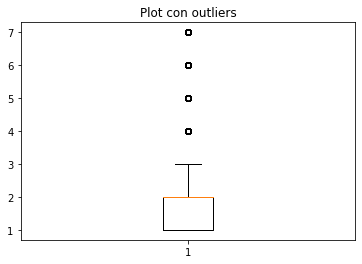

In [16]:
# boxplot con valores que son atipicos
fig1, ax1 = plt.subplots()
ax1.set_title('Plot con outliers')
ax1.boxplot(df_vacunacion["orden_dosis"])

{'whiskers': [<matplotlib.lines.Line2D at 0x25ed0e780a0>,
 'caps': [<matplotlib.lines.Line2D at 0x25ed0e78760>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ed0e6bd00>],
 'medians': [<matplotlib.lines.Line2D at 0x25ed0e78e20>],
 'fliers': [],
 'means': []}

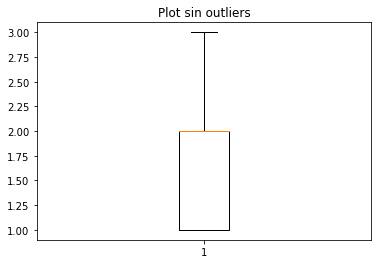

In [17]:
# grafico sin valores atipicos 
fig4, ax4 = plt.subplots()
ax4.set_title('Plot sin outliers')
ax4.boxplot(df_vacunacion["orden_dosis"], showfliers=False)

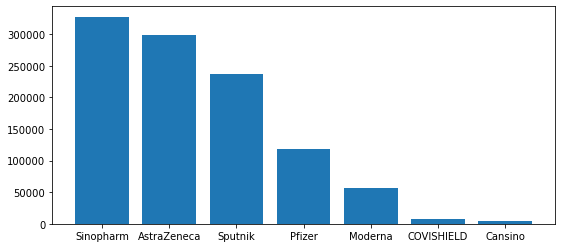

In [29]:
# grafico de barras de las vacunas aplicadas
fig, ax = plt.subplots(figsize=(9,4))
ax.bar(df_vacunacion["vacuna"].value_counts().index,df_vacunacion["vacuna"].value_counts().values)
plt.show()

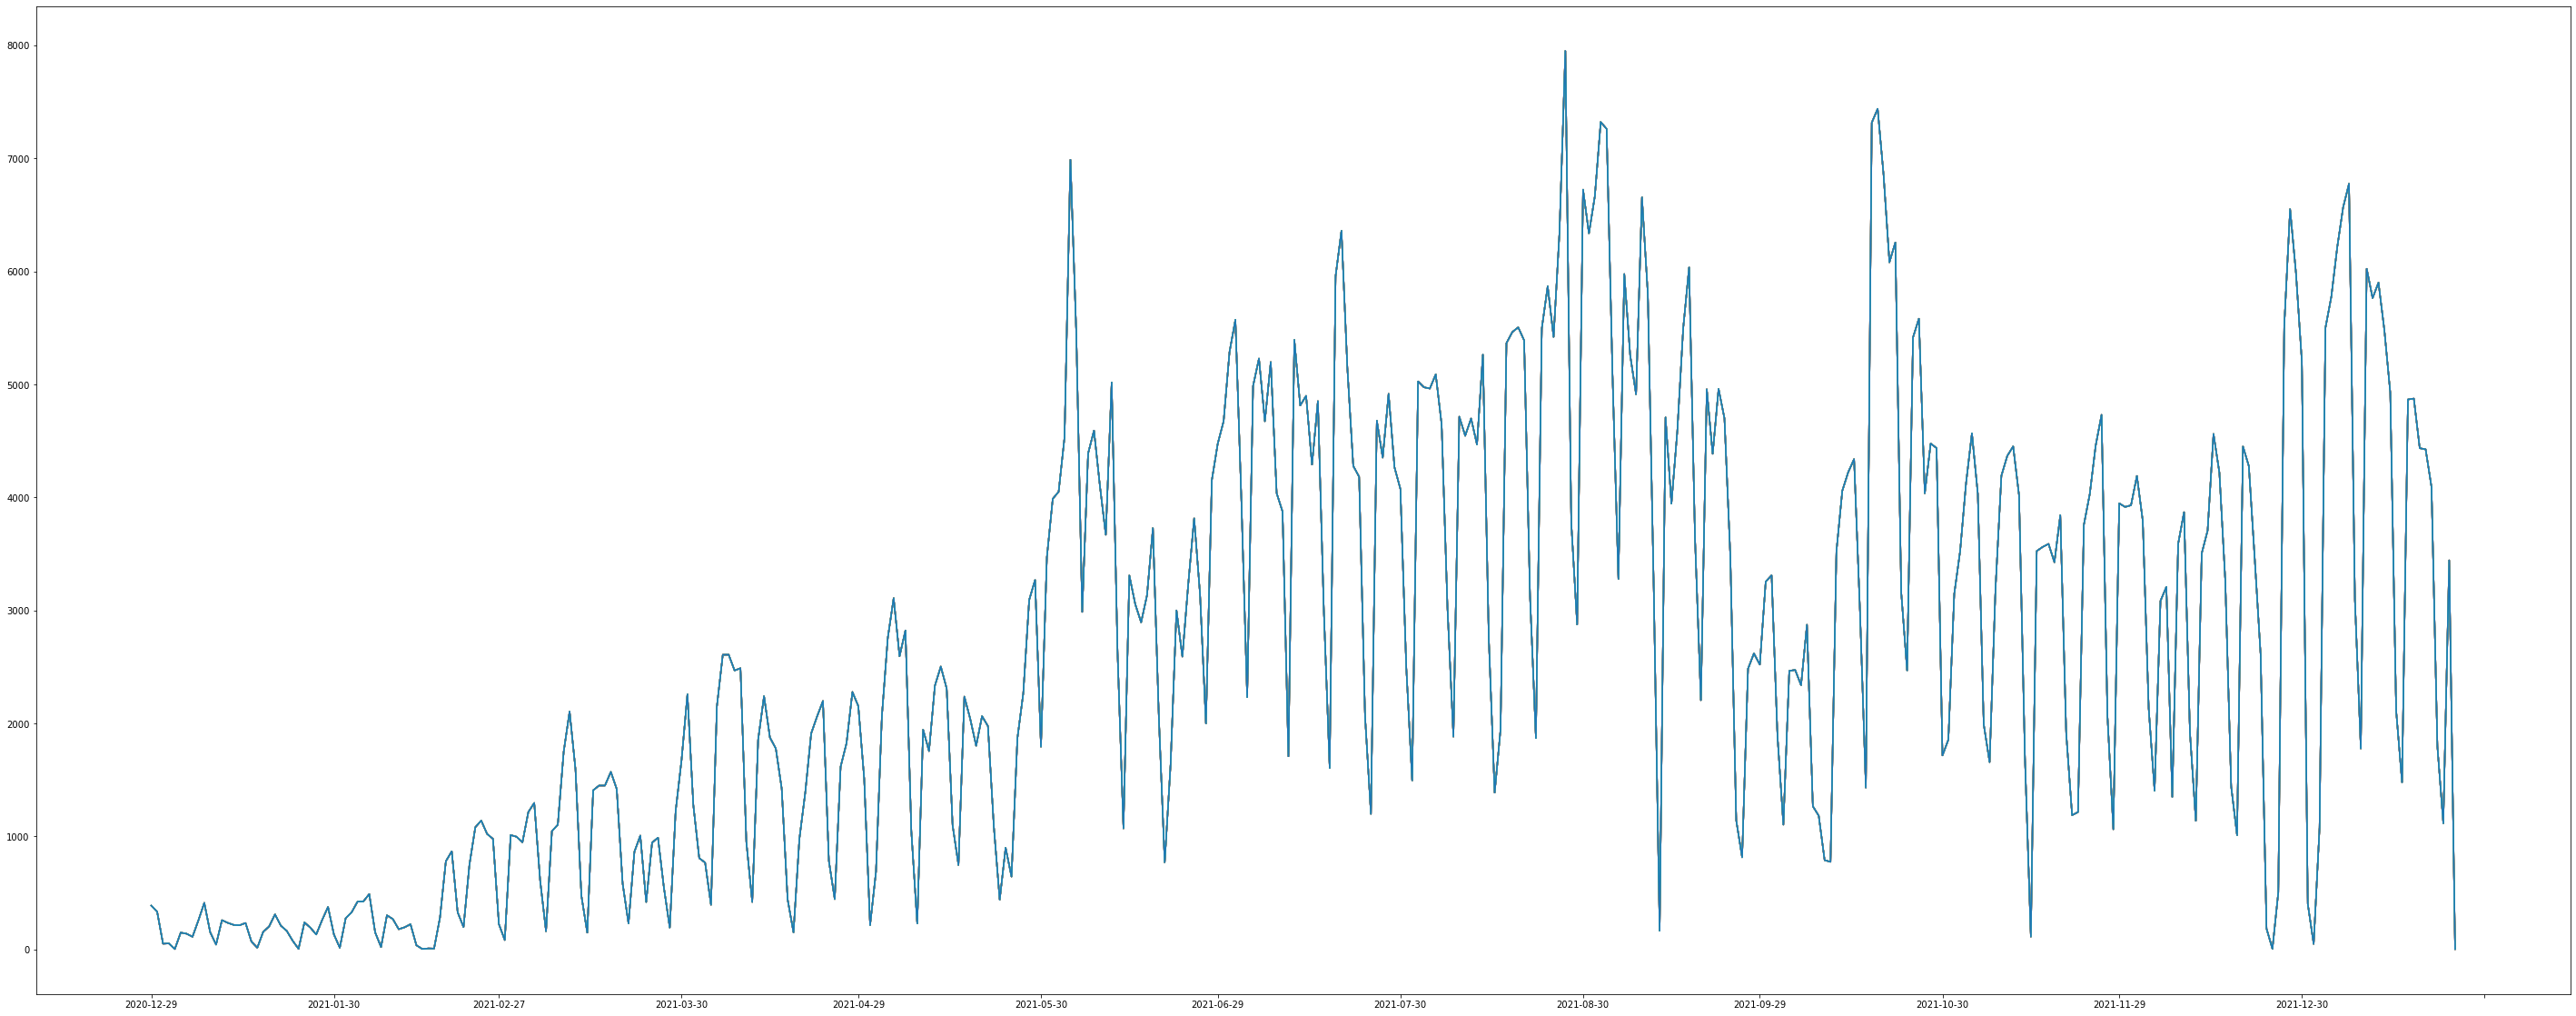

In [6]:
# linea en el tiempo
import matplotlib.dates as mdates
import datetime as dt

fig, ax = plt.subplots(figsize=(50,20))

x = df_vacunacion["fecha_aplicacion"].value_counts().index
x =x.sort_values()
y = df_vacunacion.groupby("fecha_aplicacion").count().values

half_year_locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(half_year_locator) 

ax.plot(x,y)
plt.show()

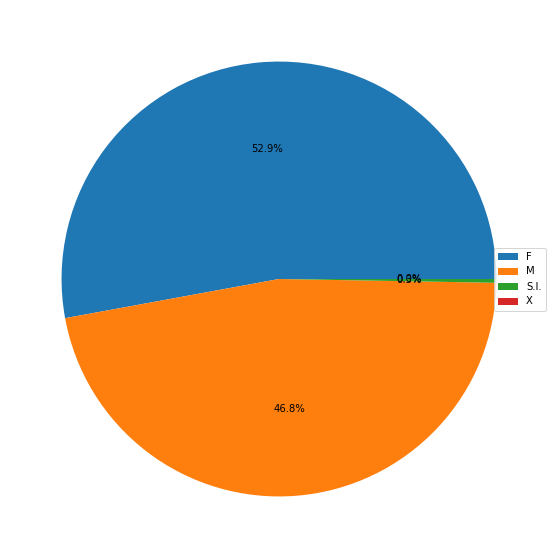

In [18]:
# diagrama de torta de sexos
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(df_vacunacion["sexo"].value_counts().values,autopct='%1.1f%%')
plt.legend(df_vacunacion["sexo"].value_counts().index,loc="right")
plt.show()

In [31]:
y = df_vacunacion.groupby("fecha_aplicacion").count().values

### Bibliografia
https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html

https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce